In [126]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
import plotly.express as px
from scipy.stats import ttest_ind

# for geocoding
import requests
import json

import pickle

pd.set_option('display.max_columns', 100)

In [4]:
# !pip install plotly

In [161]:
df = pickle.load(open("data/clean_data/team20_clean_MM_FA_FM_county_202207191713.pkl","rb"))

In [162]:
df["count_SNAP"] = df["count_SNAP_participation_FM"] + df["count_SNAP_participation_CSA"] + df["count_SNAP_participation_OFM"]
df["count_FNAP"] = df["count_FNAP_participation_FM"] + df["count_FNAP_participation_CSA"] + df["count_FNAP_participation_OFM"]
df

,FIPS,State,2019 Food Insecurity Rate,# of Food Insecure Persons in 2019,Low Threshold in state,Low Threshold Type,High Threshold in state,High Threshold Type,2019 Child food insecurity rate,# of Food Insecure Children in 2019,% food insecure children in HH w/ HH incomes below 185 FPL in 2019,% food insecure children in HH w/ HH incomes above 185 FPL in 2019,2019 Cost Per Meal,2019 Weighted Annual Food Budget Shortfall,P_FI_Below_Low_Threshold,P_FI_Between_Thresholds,P_FI_Above_High_Threshold,County,count_OFM,count_SNAP_participation_OFM,count_FNAP_participation_OFM,count_WIC_participation_OFM,count_SFMNP_participation_OFM,count_CSA,count_SNAP_participation_CSA,count_FNAP_participation_CSA,count_WIC_participation_CSA,count_SFMNP_participation_CSA,count_FM,count_SNAP_participation_FM,count_FNAP_participation_FM,count_WIC_participation_FM,count_SFMNP_participation_FM,TractSNAP,TractHUNV,TractKids,TractSeniors,lahunvhalf,LALOWI05_10,PovertyRate,lalowihalf,TractLOWI,Urban,MedianFamilyIncome,count_SNAP,count_FNAP
0,1001,Alabama,15.7,8670,130,SNAP,185,Other Nutrition Program,19.6,2590.0,69,31,3.00,4439000.0,48.6,10.9,40.6,Autauga County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,224.333333,99.250000,1217.750000,545.500000,87.009806,858.229840,16.130786,1293.160619,1436.916667,12.0,69337.500000,0.0,0.0
1,1003,Alabama,13.4,28590,130,SNAP,185,Other Nutrition Program,14.4,6680.0,79,21,3.66,17895000.0,39.1,19.2,41.7,Baldwin County,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,191.161290,87.258065,1351.548387,986.064516,70.270895,1054.515175,11.845546,1552.104536,1865.903226,31.0,72665.741935,1.0,1.0
2,1005,Alabama,20.7,5250,130,SNAP,185,Other Nutrition Program,32.4,1720.0,72,28,3.11,2788000.0,66.3,6.2,27.5,Barbour County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,279.555556,94.333333,668.333333,434.333333,82.501394,556.630110,29.299325,1322.333301,1341.444444,9.0,44792.444444,0.0,0.0
3,1007,Alabama,16.3,3680,130,SNAP,185,Other Nutrition Program,21.8,1010.0,89,11,2.96,1861000.0,47.8,21.3,30.9,Bibb County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,212.250000,102.500000,1300.250000,726.500000,110.154647,25.542561,12.193524,2087.128682,1992.000000,4.0,60645.500000,0.0,0.0
4,1009,Alabama,14.5,8380,130,SNAP,185,Other Nutrition Program,15.4,2060.0,100,0,3.04,4357000.0,46.2,28.0,25.8,Blount County,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,218.444444,95.111111,1567.333333,937.666667,91.316874,2038.838706,14.850748,2200.824287,2310.555556,9.0,60437.666667,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Wyoming,11.3,4940,130,SNAP,185,Other Nutrition Program,14.7,1700.0,60,40,3.36,2839000.0,41.2,14.5,44.3,Sweetwater County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.250000,32.333333,989.083333,303.583333,31.090187,358.935475,11.602957,772.067357,918.000000,12.0,85896.833333,0.0,0.0
3138,56039,Wyoming,9.0,2100,130,SNAP,185,Other Nutrition Program,7.2,320.0,81,19,4.61,1655000.0,33.0,18.5,48.6,Teton County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.500000,54.500000,1019.000000,524.500000,35.900055,287.517377,7.443584,891.379629,1161.500000,4.0,112766.750000,0.0,0.0
3139,56041,Wyoming,12.6,2590,130,SNAP,185,Other Nutrition Program,16.2,960.0,59,41,3.06,1357000.0,50.4,8.7,41.0,Uinta County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.333333,100.666667,2123.666667,624.666667,94.501266,96.730785,12.443318,1890.085769,2180.666667,3.0,70347.666667,0.0,0.0
3140,56043,Wyoming,11.6,930,130,SNAP,185,Other Nutrition Program,16.4,330.0,76,24,3.24,515000.0,45.1,17.4,37.5,Washakie County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.333333,57.333333,724.000000,502.666667,35.055937,252.691081,12.547283,461.128157,776.000000,3.0,67003.666667,0.0,0.0


In [102]:
# proportion of FNAP participation for every business type
share = []
business_types = ["FM", "CSA", "OFM"]
counts = []
fnap_counts = []
non_fnap_counts = []

for business in business_types:
    total_businesses = df["count_{}".format(business)].sum()
    counts.append(total_businesses)
    fnap_par = df["count_FNAP_participation_{}".format(business)].sum()
    fnap_counts.append(fnap_par)
    non_fnap_counts.append(total_businesses - fnap_par)
    share.append(fnap_par/total_businesses)

In [103]:
df_market = pd.DataFrame({
    "business": business_types,
    "Participants in FNAP": fnap_counts,
    "Non-participants in FNAP":non_fnap_counts,
})

In [104]:
df_market

,business,Participants in FNAP,Non-participants in FNAP
0,FM,799.0,209.0
1,CSA,208.0,752.0
2,OFM,210.0,1442.0


In [105]:
px.bar(df_market, x="business", y=["Participants in FNAP", "Non-participants in FNAP"], labels={
    "business": "Business types",
    "value": "Number of businesses"
})

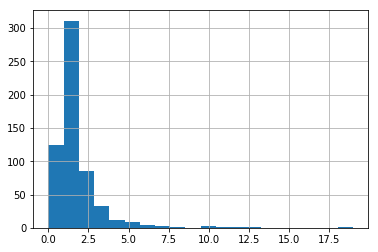

In [120]:
# SNAP, WIC and SFMNP share in FM

df_sub = df[df["count_FM"]>0]

df_sub["count_FNAP_participation_FM"].hist(bins=20)

In [123]:
df_sub.sort_values(by="count_FNAP_participation_FM",ascending=False)

,FIPS,State,2019 Food Insecurity Rate,# of Food Insecure Persons in 2019,Low Threshold in state,Low Threshold Type,High Threshold in state,High Threshold Type,2019 Child food insecurity rate,# of Food Insecure Children in 2019,% food insecure children in HH w/ HH incomes below 185 FPL in 2019,% food insecure children in HH w/ HH incomes above 185 FPL in 2019,2019 Cost Per Meal,2019 Weighted Annual Food Budget Shortfall,P_FI_Below_Low_Threshold,P_FI_Between_Thresholds,P_FI_Above_High_Threshold,County,count_OFM,count_SNAP_participation_OFM,count_FNAP_participation_OFM,count_WIC_participation_OFM,count_SFMNP_participation_OFM,count_CSA,count_SNAP_participation_CSA,count_FNAP_participation_CSA,count_WIC_participation_CSA,count_SFMNP_participation_CSA,count_FM,count_SNAP_participation_FM,count_FNAP_participation_FM,count_WIC_participation_FM,count_SFMNP_participation_FM,TractSNAP,TractHUNV,TractKids,TractSeniors,lahunvhalf,LALOWI05_10,PovertyRate,lalowihalf,TractLOWI,Urban,MedianFamilyIncome,count_SNAP,count_FNAP
204,6037,California,10.7,1079900,200,"SNAP, Other Nutrition Programs",200,"SNAP, Other Nutrition Programs",14.5,321690.0,74,26,3.47,640658000.0,84.0,0.0,16.0,Los Angeles County,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,20.0,19.0,19.0,17.0,14.0,124.627249,127.833762,1029.223650,456.597686,37.905274,610.649072,16.242634,610.433002,1564.485433,2334.0,79980.204179,19.0,19.0
2314,44007,Rhode Island,11.0,69740,185,"SNAP, Other Nutrition Programs",185,"SNAP, Other Nutrition Programs",16.4,21600.0,79,21,3.53,42102000.0,70.3,0.0,29.7,Providence County,2.0,2.0,2.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,13.0,10.0,13.0,11.0,12.0,346.148936,209.985816,976.063830,598.503546,110.227719,859.667190,16.928181,839.123528,1469.248227,141.0,72617.742857,13.0,16.0
2233,41051,Oregon,11.2,89810,185,"SNAP, Other Nutrition Programs",185,"SNAP, Other Nutrition Programs",13.6,20830.0,66,34,3.63,55798000.0,63.7,0.0,36.3,Multnomah County,2.0,1.0,1.0,0.0,0.0,4.0,4.0,4.0,0.0,0.0,12.0,12.0,12.0,11.0,11.0,321.742690,239.567251,881.187135,452.766082,61.343773,603.126152,14.547653,608.965533,1459.309942,171.0,91953.147929,17.0,17.0
1225,25017,Massachusetts,6.4,102660,200,"SNAP, Other Nutrition Programs",200,"SNAP, Other Nutrition Programs",4.9,15580.0,90,10,4.18,73339000.0,58.0,0.0,42.0,Middlesex County,4.0,0.0,0.0,0.0,0.0,11.0,3.0,3.0,0.0,0.0,11.0,10.0,11.0,9.0,7.0,138.813880,199.703470,1010.848580,621.498423,76.893827,446.228313,8.334507,442.034536,838.517350,317.0,126419.514196,13.0,14.0
2294,42101,Pennsylvania,14.4,226890,160,SNAP,185,Other Nutrition Program,24.2,83460.0,57,43,3.51,136179000.0,82.3,17.7,0.0,Philadelphia County,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,10.0,0.0,10.0,9.0,10.0,398.713911,473.619423,902.459318,486.375328,140.170693,664.616573,25.020204,664.616573,1837.779528,381.0,63806.409214,2.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,27081,Minnesota,9.3,530,165,SNAP,185,Other Nutrition Program,13.6,180.0,74,27,3.09,280000.0,60.7,8.7,30.6,Lincoln County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,88.500000,44.500000,658.000000,722.000000,32.287575,86.245797,10.392380,651.936917,806.000000,2.0,65844.000000,0.0,0.0
2231,41047,Oregon,11.2,37990,185,"SNAP, Other Nutrition Programs",185,"SNAP, Other Nutrition Programs",15.0,12640.0,84,16,3.10,20149000.0,78.6,0.0,21.4,Marion County,4.0,0.0,1.0,1.0,0.0,4.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,389.413793,123.137931,1437.603448,699.120690,61.283081,1344.230389,14.787414,1335.565559,2125.362069,58.0,67231.896552,1.0,3.0
2249,42011,Pennsylvania,9.4,39480,160,SNAP,185,Other Nutrition Program,13.6,12770.0,81,19,3.20,21608000.0,62.4,5.8,31.9,Berks County,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,230.933333,142.366667,1090.400000,661.755556,60.366053,647.951049,15.457457,751.036015,1334.777778,90.0,68702.700000,0.0,0.0
765,18137,In

Text(0.5,1,"Boxplot of Farmer's market numbers vs. food insecurity")

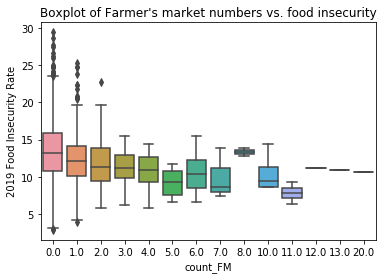

In [11]:
# more EDAs

sns.boxplot(x = "count_FM", y='2019 Food Insecurity Rate', data = df)
plt.title("Boxplot of Farmer's market numbers vs. food insecurity")

Text(0.5,1,"Boxplot of Farmer's market with FNAP numbers vs. food insecurity")

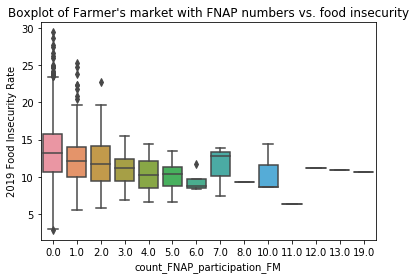

In [12]:
sns.boxplot(x = "count_FNAP_participation_FM", y='2019 Food Insecurity Rate', data = df)
plt.title("Boxplot of Farmer's market with FNAP numbers vs. food insecurity")

Text(0.5,1,'Boxplot of CSA numbers vs. food insecurity')

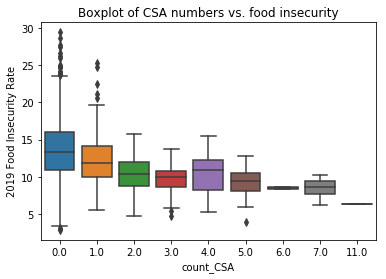

In [13]:
sns.boxplot(x = "count_CSA", y='2019 Food Insecurity Rate', data = df)
plt.title("Boxplot of CSA numbers vs. food insecurity")

Text(0.5,1,'Boxplot of FNAP numbers with FNP vs. food insecurity')

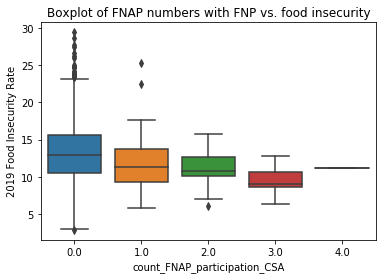

In [14]:
sns.boxplot(x = "count_FNAP_participation_CSA", y='2019 Food Insecurity Rate', data = df)
plt.title("Boxplot of FNAP numbers with FNP vs. food insecurity")

Text(0.5,1,'Boxplot of On-farm market numbers vs. food insecurity')

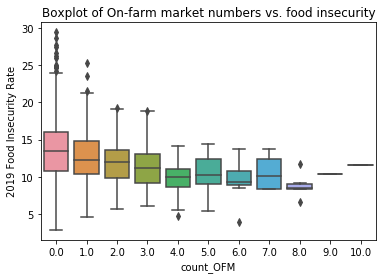

In [15]:
sns.boxplot(x = "count_OFM", y='2019 Food Insecurity Rate', data = df)
plt.title("Boxplot of On-farm market numbers vs. food insecurity")

Text(0.5,1,'Boxplot of On-farm market with FNAP numbers vs. food insecurity')

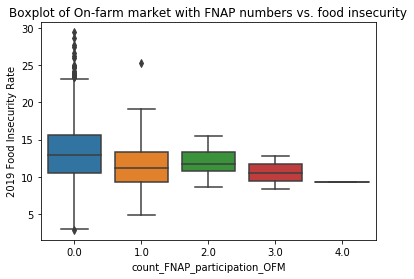

In [16]:
sns.boxplot(x = "count_FNAP_participation_OFM", y='2019 Food Insecurity Rate', data = df)
plt.title("Boxplot of On-farm market with FNAP numbers vs. food insecurity")

In [163]:
business_types

['FM', 'CSA', 'OFM']

In [164]:
for btype in business_types:
    yes = df[(df["count_{}".format(btype)] > 0)]
    no = df[(df["count_{}".format(btype)] == 0)]

    print('{} vs no'.format(btype), ttest_ind(yes['2019 Food Insecurity Rate'], no['2019 Food Insecurity Rate'], equal_var=False))

FM vs no Ttest_indResult(statistic=-8.898875033834303, pvalue=2.790251802452579e-18)
CSA vs no Ttest_indResult(statistic=-14.21735015110346, pvalue=4.7147936286673843e-42)
OFM vs no Ttest_indResult(statistic=-11.327781868898342, pvalue=6.535656305283058e-29)


In [135]:
for btype in business_types:
    yesFNAP = df[(df["count_FNAP_participation_{}".format(btype)] > 0)]
    noFNAP = df[(df["count_FNAP_participation_{}".format(btype)] == 0)]

    print('{} FNAP vs. No FNAP'.format(btype), ttest_ind(yesFNAP['2019 Food Insecurity Rate'], noFNAP['2019 Food Insecurity Rate'], equal_var=False))

FM FNAP vs. No FNAP Ttest_indResult(statistic=-7.835685019592806, pvalue=1.7836079528583058e-14)
CSA FNAP vs. No FNAP Ttest_indResult(statistic=-7.203411138889771, pvalue=1.0866401183645116e-11)
OFM FNAP vs. No FNAP Ttest_indResult(statistic=-7.366647440293037, pvalue=3.6130215183572727e-12)


Text(0.5,1,'Boxplot of FM vs. food insecurity')

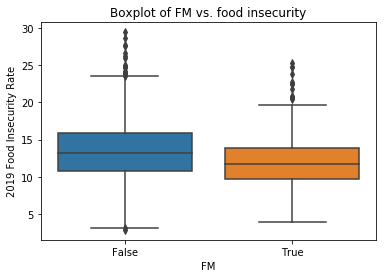

In [137]:
df_subselect = df.copy()
df_subselect["FM"] = df_subselect["count_FM"] > 0

sns.boxplot(x = "FM", y='2019 Food Insecurity Rate', data = df_subselect)
plt.title("Boxplot of FM vs. food insecurity")

Text(0.5,1,"Boxplot of farmer's market with FNAP vs. food insecurity")

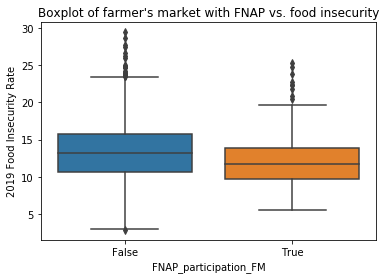

In [23]:
df_subselect = df.copy()
df_subselect["FNAP_participation_FM"] = df_subselect["count_FNAP_participation_FM"] > 0

sns.boxplot(x = "FNAP_participation_FM", y='2019 Food Insecurity Rate', data = df_subselect)
plt.title("Boxplot of farmer's market with FNAP vs. food insecurity")

Text(0.5,1,'Boxplot of CSA vs. food insecurity')

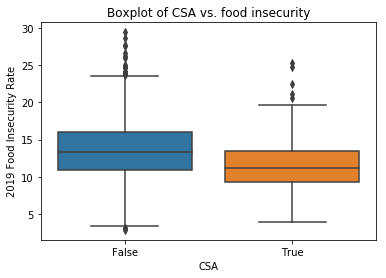

In [29]:
df_subselect = df.copy()
df_subselect["CSA"] = df_subselect["count_CSA"] > 0

sns.boxplot(x = "CSA", y='2019 Food Insecurity Rate', data = df_subselect)
plt.title("Boxplot of CSA vs. food insecurity")

Text(0.5,1,'Boxplot of CSA with FNAP vs. food insecurity')

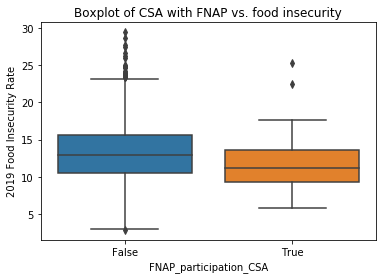

In [24]:
df_subselect = df.copy()
df_subselect["FNAP_participation_CSA"] = df_subselect["count_FNAP_participation_CSA"] > 0

sns.boxplot(x = "FNAP_participation_CSA", y='2019 Food Insecurity Rate', data = df_subselect)
plt.title("Boxplot of CSA with FNAP vs. food insecurity")

In [156]:
df["FNAP_FM"] = df["count_FNAP_participation_FM"] > 0
df["SNAP_FM"] = df["count_SNAP_participation_FM"] > 0

In [157]:
df["Low Threshold Type"].unique()

array(['SNAP', 'SNAP, Other Nutrition Programs'], dtype=object)

In [57]:
df

,FIPS,State,2019 Food Insecurity Rate,# of Food Insecure Persons in 2019,Low Threshold in state,Low Threshold Type,High Threshold in state,High Threshold Type,2019 Child food insecurity rate,# of Food Insecure Children in 2019,% food insecure children in HH w/ HH incomes below 185 FPL in 2019,% food insecure children in HH w/ HH incomes above 185 FPL in 2019,2019 Cost Per Meal,2019 Weighted Annual Food Budget Shortfall,P_FI_Below_Low_Threshold,P_FI_Between_Thresholds,P_FI_Above_High_Threshold,County,count_OFM,count_SNAP_participation_OFM,count_FNAP_participation_OFM,count_WIC_participation_OFM,count_SFMNP_participation_OFM,count_CSA,count_SNAP_participation_CSA,count_FNAP_participation_CSA,count_WIC_participation_CSA,count_SFMNP_participation_CSA,count_FM,count_SNAP_participation_FM,count_FNAP_participation_FM,count_WIC_participation_FM,count_SFMNP_participation_FM,TractSNAP,TractHUNV,TractKids,TractSeniors,lahunvhalf,LALOWI05_10,PovertyRate,lalowihalf,TractLOWI,Urban,MedianFamilyIncome,count_SNAP,count_FNAP,FNAP_FM
0,1001,Alabama,15.7,8670,130,SNAP,185,Other Nutrition Program,19.6,2590.0,69,31,3.00,4439000.0,48.6,10.9,40.6,Autauga County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,224.333333,99.250000,1217.750000,545.500000,87.009806,858.229840,16.130786,1293.160619,1436.916667,12.0,69337.500000,0.0,0.0,False
1,1003,Alabama,13.4,28590,130,SNAP,185,Other Nutrition Program,14.4,6680.0,79,21,3.66,17895000.0,39.1,19.2,41.7,Baldwin County,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,191.161290,87.258065,1351.548387,986.064516,70.270895,1054.515175,11.845546,1552.104536,1865.903226,31.0,72665.741935,1.0,1.0,False
2,1005,Alabama,20.7,5250,130,SNAP,185,Other Nutrition Program,32.4,1720.0,72,28,3.11,2788000.0,66.3,6.2,27.5,Barbour County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,279.555556,94.333333,668.333333,434.333333,82.501394,556.630110,29.299325,1322.333301,1341.444444,9.0,44792.444444,0.0,0.0,False
3,1007,Alabama,16.3,3680,130,SNAP,185,Other Nutrition Program,21.8,1010.0,89,11,2.96,1861000.0,47.8,21.3,30.9,Bibb County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,212.250000,102.500000,1300.250000,726.500000,110.154647,25.542561,12.193524,2087.128682,1992.000000,4.0,60645.500000,0.0,0.0,False
4,1009,Alabama,14.5,8380,130,SNAP,185,Other Nutrition Program,15.4,2060.0,100,0,3.04,4357000.0,46.2,28.0,25.8,Blount County,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,218.444444,95.111111,1567.333333,937.666667,91.316874,2038.838706,14.850748,2200.824287,2310.555556,9.0,60437.666667,1.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Wyoming,11.3,4940,130,SNAP,185,Other Nutrition Program,14.7,1700.0,60,40,3.36,2839000.0,41.2,14.5,44.3,Sweetwater County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.250000,32.333333,989.083333,303.583333,31.090187,358.935475,11.602957,772.067357,918.000000,12.0,85896.833333,0.0,0.0,False
3138,56039,Wyoming,9.0,2100,130,SNAP,185,Other Nutrition Program,7.2,320.0,81,19,4.61,1655000.0,33.0,18.5,48.6,Teton County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.500000,54.500000,1019.000000,524.500000,35.900055,287.517377,7.443584,891.379629,1161.500000,4.0,112766.750000,0.0,0.0,False
3139,56041,Wyoming,12.6,2590,130,SNAP,185,Other Nutrition Program,16.2,960.0,59,41,3.06,1357000.0,50.4,8.7,41.0,Uinta County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.333333,100.666667,2123.666667,624.666667,94.501266,96.730785,12.443318,1890.085769,2180.666667,3.0,70347.666667,0.0,0.0,False
3140,56043,Wyoming,11.6,930,130,SNAP,185,Other Nutrition Program,16.4,330.0,76,24,3.24,515000.0,45.1,17.4,37.5,Washakie County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.333333,57.333333,724.000000,502.666667,35.055937,252.691081,12.5

#### Conclusion: Allowing other forms of FNAP in low threshold type increases the number of participation

Accepting one type of FNAP in FM is strongly associated with accepting the others, therefore expanding access. 

In [75]:
df[["count_SNAP_participation_FM", "count_WIC_participation_FM", "count_SFMNP_participation_FM"]].corr()

,count_SNAP_participation_FM,count_WIC_participation_FM,count_SFMNP_participation_FM
count_SNAP_participation_FM,1.000000,0.839867,0.825650
count_WIC_participation_FM,0.839867,1.000000,0.907181
count_SFMNP_participation_FM,0.825650,0.907181,1.000000


In [99]:
df[["count_SNAP_participation_OFM", "count_WIC_participation_OFM"]].corr()

,count_SNAP_participation_OFM,count_WIC_participation_OFM
count_SNAP_participation_OFM,1.000000,0.231603
count_WIC_participation_OFM,0.231603,1.000000


In [158]:
df_sub = df[df["count_FNAP_participation_FM"] > 0]

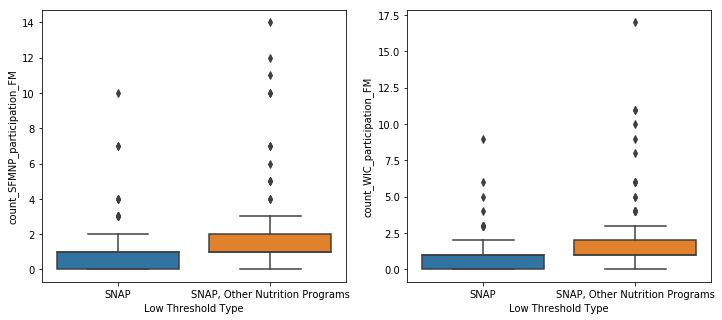

In [159]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x ="Low Threshold Type", y='count_SFMNP_participation_FM', data = df_sub, ax=axes[0])
sns.boxplot(x ="Low Threshold Type", y='count_WIC_participation_FM', data = df_sub, ax=axes[1])

In [139]:
snap = df_sub[(df_sub["Low Threshold Type"] == "SNAP")]
snapandother = df_sub[(df_sub["Low Threshold Type"] != "SNAP")]

print('Low Threshold Type on SFMNP par'.format(btype), ttest_ind(snap['count_SFMNP_participation_FM'], snapandother['count_SFMNP_participation_FM'], equal_var=False))
print('Low Threshold Type on WIC par'.format(btype), ttest_ind(snap['count_WIC_participation_FM'], snapandother['count_WIC_participation_FM'], equal_var=False))

Low Threshold Type on SFMNP par Ttest_indResult(statistic=-4.318864392572922, pvalue=1.8965019524907162e-05)
Low Threshold Type on WIC par Ttest_indResult(statistic=-5.491369876575193, pvalue=6.669404903501763e-08)


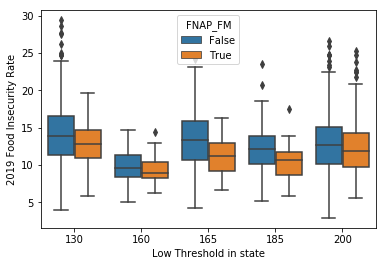

In [56]:
sns.boxplot(x ="Low Threshold in state", y='2019 Food Insecurity Rate', hue = "FNAP_FM", data = df)

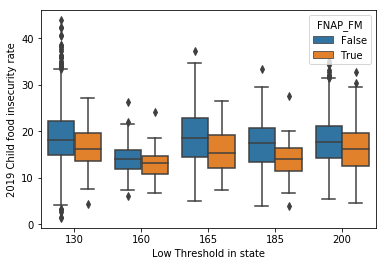

In [160]:
sns.boxplot(x ="Low Threshold in state", y='2019 Child food insecurity rate', hue = "FNAP_FM", data = df)

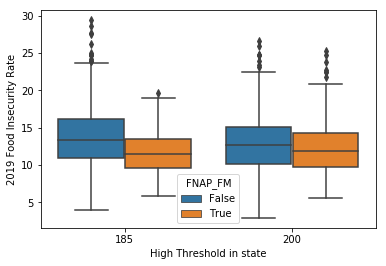

In [72]:
sns.boxplot(x ="High Threshold in state", y='2019 Food Insecurity Rate', hue = "FNAP_FM", data = df)

Conclusion: treatment of FNAP_FM does affect 2019 food insecurity rate, and so does the treatment of having an FM. 

### Correlation study

In [90]:
# correlation study

df_corr = df.drop(columns=["FIPS"])

corrm = df_corr.corr()
corrm

,2019 Food Insecurity Rate,# of Food Insecure Persons in 2019,Low Threshold in state,High Threshold in state,2019 Child food insecurity rate,# of Food Insecure Children in 2019,% food insecure children in HH w/ HH incomes below 185 FPL in 2019,% food insecure children in HH w/ HH incomes above 185 FPL in 2019,2019 Cost Per Meal,2019 Weighted Annual Food Budget Shortfall,P_FI_Below_Low_Threshold,P_FI_Between_Thresholds,P_FI_Above_High_Threshold,count_OFM,count_SNAP_participation_OFM,count_FNAP_participation_OFM,count_WIC_participation_OFM,count_SFMNP_participation_OFM,count_CSA,count_SNAP_participation_CSA,count_FNAP_participation_CSA,count_WIC_participation_CSA,count_SFMNP_participation_CSA,count_FM,count_SNAP_participation_FM,count_FNAP_participation_FM,count_WIC_participation_FM,count_SFMNP_participation_FM,TractSNAP,TractHUNV,TractKids,TractSeniors,lahunvhalf,LALOWI05_10,PovertyRate,lalowihalf,TractLOWI,Urban,MedianFamilyIncome,count_SNAP,count_FNAP,FNAP_FM,SNAP_FM
2019 Food Insecurity Rate,1.000000,-0.079796,-0.181204,-0.100266,0.889784,-0.062417,0.222056,-0.221213,-0.350498,-0.091470,0.310182,0.099632,-0.433222,-0.208311,-0.088724,-0.098559,-0.054128,NaN,-0.235559,-0.105044,-0.105265,-0.010960,NaN,-0.140088,-0.118457,-0.122381,-0.113803,-0.096511,0.560969,0.210594,-0.053836,0.039987,0.409582,0.156025,0.802463,0.571793,0.480866,-0.130218,-0.741176,-0.145853,-0.149650,-0.126469,-0.135285
# of Food Insecure Persons in 2019,-0.079796,1.000000,0.130530,0.102880,-0.079031,0.985252,-0.094324,0.094001,0.136996,0.992647,0.091436,-0.119872,-0.010194,0.239714,0.210826,0.196933,0.062522,NaN,0.320896,0.235691,0.241418,0.058226,NaN,0.600269,0.561159,0.551001,0.504356,0.460191,0.064621,0.260873,0.136341,-0.058205,0.007493,0.130451,0.006473,-0.084168,0.082584,0.967375,0.204478,0.560455,0.550178,0.300381,0.319907
Low Threshold in state,-0.181204,0.130530,1.000000,0.858544,-0.097150,0.119782,-0.000610,0.000886,0.177461,0.139041,0.575468,-0.774537,-0.048851,0.188088,0.093581,0.106700,0.067496,NaN,0.212169,0.157516,0.159439,0.052595,NaN,0.146994,0.135060,0.154883,0.167142,0.151903,0.010786,0.049190,-0.120121,0.017369,-0.065498,-0.078326,-0.107843,-0.163629,-0.117569,0.142013,0.170634,0.175294,0.191655,0.184302,0.153755
High Threshold in state,-0.100266,0.102880,0.858544,1.000000,-0.057017,0.089756,0.013232,-0.013040,0.156532,0.113237,0.502276,-0.626408,-0.081639,0.131736,0.056442,0.059195,0.029141,NaN,0.140675,0.120238,0.120658,0.039561,NaN,0.114641,0.111428,0.123403,0.135104,0.126260,0.052072,0.072096,-0.101470,0.011200,-0.004368,-0.058953,-0.029218,-0.067075,-0.043505,0.113231,0.086603,0.136407,0.144463,0.158788,0.129512
2019 Child food insecurity rate,0.889784,-0.079031,-0.097150,-0.057017,1.000000,-0.045493,0.070438,-0.069764,-0.326656,-0.091614,0.406716,0.003816,-0.468249,-0.226672,-0.089744,-0.097008,-0.045549,NaN,-0.250008,-0.113194,-0.113610,-0.017614,NaN,-0.151373,-0.131058,-0.135145,-0.122873,-0.105271,0.520537,0.194402,-0.143363,0.006710,0.391751,0.106088,0.783835,0.479400,0.380377,-0.124047,-0.754027,-0.158304,-0.161558,-0.147499,-0.148805
# of Food Insecure Children in 2019,-0.062417,0.985252,0.119782,0.089756,-0.045493,1.000000,-0.096461,0.096125,0.096482,0.964180,0.109001,-0.111617,-0.036778,0.212089,0.197518,0.183825,0.054707,NaN,0.277825,0.212777,0.217590,0.048393,NaN,0.558225,0.504209,0.500475,0.450004,0.417978,0.079395,0.226553,0.150395,-0.070523,0.011022,0.139674,0.025197,-0.064657,0.101826,0.929521,0.162852,0.505972,0.500549,0.278025,0.297629
% food insecure children in HH w/ HH incomes below 185 FPL in 2019,0.222056,-0.094324,-0.000610,0.013232,0.070438,-0.096461,1.000000,-0.999772,-0.184677,-0.096444,0.306305,0.173396,-0.486755,-0.076981,-0.045786,-0.049837,-0.029802,NaN,-0.075488,-0.062208,-0.059350,0.009780,NaN,-0.079839,-0.062372,-0.071492,-0.059439,-0.056339,0.134158,0.017342,-0.002156,0.104579,0.064457,0.032768,0.119446,0.226565,0.227519,-0.101364,-0.315420,-0.078559,-0.084892,-0.071764,-0.067881
% food insecure c

In [91]:
# negatively associated with food insecurity

neg_cor = corrm["2019 Food Insecurity Rate"] <0
corrm["2019 Food Insecurity Rate"][neg_cor].sort_values(ascending = True).to_frame()

,2019 Food Insecurity Rate
MedianFamilyIncome,-0.741176
P_FI_Above_High_Threshold,-0.433222
2019 Cost Per Meal,-0.350498
count_CSA,-0.235559
% food insecure children in HH w/ HH incomes above 185 FPL in 2019,-0.221213
count_OFM,-0.208311
Low Threshold in state,-0.181204
count_FNAP,-0.149650
count_SNAP,-0.145853
count_FM,-0.140088


In [92]:
# postively associated with food insecurity as a side note

pos_cor = corrm["2019 Food Insecurity Rate"] >0
corrm["2019 Food Insecurity Rate"][pos_cor].sort_values(ascending = False).to_frame()

,2019 Food Insecurity Rate
2019 Food Insecurity Rate,1.000000
2019 Child food insecurity rate,0.889784
PovertyRate,0.802463
lalowihalf,0.571793
TractSNAP,0.560969
TractLOWI,0.480866
lahunvhalf,0.409582
P_FI_Below_Low_Threshold,0.310182
% food insecure children in HH w/ HH incomes below 185 FPL in 2019,0.222056
TractHUNV,0.210594


In [93]:
# if SNAP provided by FM, CSA and OFM is correlated with num. of SNAP recipient

df[["TractSNAP", "count_SNAP", "count_SNAP_participation_FM", "count_SNAP_participation_OFM", "count_SNAP_participation_CSA"]].corr()

,TractSNAP,count_SNAP,count_SNAP_participation_FM,count_SNAP_participation_OFM,count_SNAP_participation_CSA
TractSNAP,1.000000,0.020456,0.012538,0.026142,0.013417
count_SNAP,0.020456,1.000000,0.910622,0.473249,0.576861
count_SNAP_participation_FM,0.012538,0.910622,1.000000,0.184579,0.287493
count_SNAP_participation_OFM,0.026142,0.473249,0.184579,1.000000,0.240135
count_SNAP_participation_CSA,0.013417,0.576861,0.287493,0.240135,1.000000


In [94]:
df_snap = df[df["count_SNAP"]>0]
df_snap[["TractSNAP", "count_SNAP", "count_SNAP_participation_FM", "count_SNAP_participation_OFM", "count_SNAP_participation_CSA"]].corr()

,TractSNAP,count_SNAP,count_SNAP_participation_FM,count_SNAP_participation_OFM,count_SNAP_participation_CSA
TractSNAP,1.000000,-0.007444,-0.016656,0.033102,-0.007939
count_SNAP,-0.007444,1.000000,0.884902,0.235759,0.395883
count_SNAP_participation_FM,-0.016656,0.884902,1.000000,-0.087203,0.051396
count_SNAP_participation_OFM,0.033102,0.235759,-0.087203,1.000000,0.017815
count_SNAP_participation_CSA,-0.007939,0.395883,0.051396,0.017815,1.000000


In [95]:
# if the number of seniors is correlated with num. of SFMNP? 

df[["TractSeniors", "count_SFMNP_participation_FM"]].corr()

,TractSeniors,count_SFMNP_participation_FM
TractSeniors,1.000000,-0.028285
count_SFMNP_participation_FM,-0.028285,1.000000


In [96]:
df_fm = df[df["count_FM"]>0]
df_fm[["TractSeniors", "count_SFMNP_participation_FM"]].corr()

,TractSeniors,count_SFMNP_participation_FM
TractSeniors,1.00000,-0.06126
count_SFMNP_participation_FM,-0.06126,1.00000


In [150]:
df["household_estimated"] = df["# of Food Insecure Persons in 2019"] / df["2019 Food Insecurity Rate"]

In [149]:
df["senior_per_household"] = df["TractSeniors"] / df["household_estimated"]

df_fm = df[df["count_FM"]>0]
df_fm[["senior_per_household", "count_SFMNP_participation_FM"]].corr()

,senior_per_household,count_SFMNP_participation_FM
senior_per_household,1.000000,-0.158749
count_SFMNP_participation_FM,-0.158749,1.000000


In [151]:
df[["2019 Child food insecurity rate", "count_WIC_participation_FM"]].corr()

,2019 Child food insecurity rate,count_WIC_participation_FM
2019 Child food insecurity rate,1.000000,-0.122873
count_WIC_participation_FM,-0.122873,1.000000


In [152]:
df_fm = df[df["count_FM"]>0]

df_fm[["2019 Child food insecurity rate", "count_WIC_participation_FM"]].corr()

,2019 Child food insecurity rate,count_WIC_participation_FM
2019 Child food insecurity rate,1.000000,-0.135408
count_WIC_participation_FM,-0.135408,1.000000


In [ ]:
df_fm[["TractSeniors", "count_SFMNP_participation_FM"]].corr()

Ans: Not really. The offering of SFMNP is less correlated with where seniors are located. 

Takeaway: The provision of WIC and SFMNP seems to be less correlated with the number of recipient in that region. Maybe more focuses should be directed to promote SNAP and SFMNP where it is needed. 

In [133]:
# correlation heat map

matrix = df.corr()
matrix = matrix.unstack()
matrix = matrix[abs(matrix) >= 0.13]
matrix["2019 Food Insecurity Rate"].to_frame()

,0
2019 Food Insecurity Rate,1.000000
Low Threshold in state,-0.181204
2019 Child food insecurity rate,0.889784
% food insecure children in HH w/ HH incomes below 185 FPL in 2019,0.222056
% food insecure children in HH w/ HH incomes above 185 FPL in 2019,-0.221213
2019 Cost Per Meal,-0.350498
P_FI_Below_Low_Threshold,0.310182
P_FI_Above_High_Threshold,-0.433222
count_OFM,-0.208311
count_CSA,-0.235559


In [138]:
# realize that need to scale the features

In [188]:
from sklearn.preprocessing import Normalizer, StandardScaler

In [189]:
df = pickle.load(open("data/clean_data/team20_clean_MM_FA_FM_county_202207191713.pkl","rb"))
df = df.drop(columns=["FIPS", "State", "County", "High Threshold Type","Low Threshold Type"])
df = df.dropna()

In [190]:
df.columns

Index(['2019 Food Insecurity Rate', '# of Food Insecure Persons in 2019',
       'Low Threshold in state', 'High Threshold in state',
       '2019 Child food insecurity rate',
       '# of Food Insecure Children in 2019',
       '% food insecure children in HH w/ HH incomes below 185 FPL in 2019',
       '% food insecure children in HH w/ HH incomes above 185 FPL in 2019',
       '2019 Cost Per Meal', '2019 Weighted Annual Food Budget Shortfall',
       'P_FI_Below_Low_Threshold', 'P_FI_Between_Thresholds',
       'P_FI_Above_High_Threshold', 'count_OFM',
       'count_SNAP_participation_OFM', 'count_FNAP_participation_OFM',
       'count_WIC_participation_OFM', 'count_SFMNP_participation_OFM',
       'count_CSA', 'count_SNAP_participation_CSA',
       'count_FNAP_participation_CSA', 'count_WIC_participation_CSA',
       'count_SFMNP_participation_CSA', 'count_FM',
       'count_SNAP_participation_FM', 'count_FNAP_participation_FM',
       'count_WIC_participation_FM', 'count_SFMNP_par

In [191]:
# get the conversion dictionary

indices = range(0, len(df.columns))

var2ind = {}
ind2var = {}

for i in indices:
    var = df.columns[i]
    var2ind[var] = i
    ind2var[i] = var

In [192]:
scaler = StandardScaler()
# scaler = Normalizer()
df_scaled = scaler.fit_transform(df)

In [193]:
corrm = np.corrcoef(df_scaled)
corrm

array([[ 1.        ,  0.10953696,  0.32051323, ...,  0.62223807,
         0.09076288,  0.28109782],
       [ 0.10953696,  1.        , -0.27978317, ...,  0.18115569,
         0.15392691,  0.08875535],
       [ 0.32051323, -0.27978317,  1.        , ..., -0.09761884,
        -0.16068521, -0.05695192],
       ...,
       [ 0.62223807,  0.18115569, -0.09761884, ...,  1.        ,
        -0.09153444,  0.14669815],
       [ 0.09076288,  0.15392691, -0.16068521, ..., -0.09153444,
         1.        ,  0.67855844],
       [ 0.28109782,  0.08875535, -0.05695192, ...,  0.14669815,
         0.67855844,  1.        ]])

In [196]:
df_temp = {"count_FNAP_participation_FM": df_scaled[:, var2ind["count_FNAP_participation_FM"]],
     "2019 Food Insecurity Rate": df_scaled[:,var2ind["2019 Food Insecurity Rate"]]}

(array([2.65e+03, 3.08e+02, 8.50e+01, 3.20e+01, 1.10e+01, 8.00e+00,
        4.00e+00, 3.00e+00, 1.00e+00, 0.00e+00, 3.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00]),
 array([-0.28225101,  0.76503853,  1.81232808,  2.85961762,  3.90690717,
         4.95419671,  6.00148626,  7.0487758 ,  8.09606535,  9.1433549 ,
        10.19064444, 11.23793399, 12.28522353, 13.33251308, 14.37980262,
        15.42709217, 16.47438171, 17.52167126, 18.5689608 , 19.61625035,
        20.66353989]),
 <a list of 20 Patch objects>)

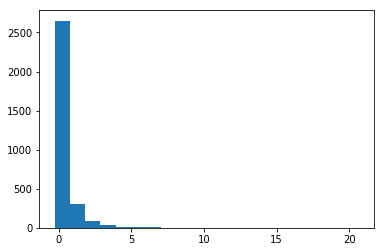

In [201]:
plt.hist(df_temp["count_FNAP_participation_FM"], bins=20)

Text(0.5,1,"Boxplot of Farmer's market with FNAP numbers vs. food insecurity")

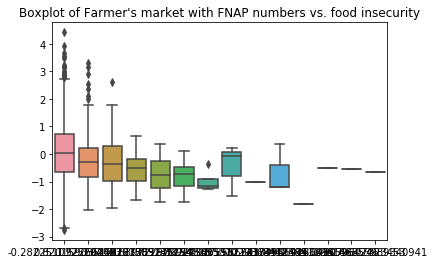

In [198]:
sns.boxplot(x = "count_FNAP_participation_FM", y='2019 Food Insecurity Rate', data = df_temp)
plt.title("Boxplot of Farmer's market with FNAP numbers vs. food insecurity")

In [194]:
sorted(zip(corrm[:, var2ind["2019 Food Insecurity Rate"]], df.columns.to_list()), key=lambda x: x[0])

[(-0.049299270884970145, 'count_FNAP_participation_CSA'),
 (-0.011053453738600378, 'count_OFM'),
 (0.022497388656112255, 'count_SFMNP_participation_OFM'),
 (0.05933890407133216,
  '% food insecure children in HH w/ HH incomes below 185 FPL in 2019'),
 (0.09807972118934254, '2019 Weighted Annual Food Budget Shortfall'),
 (0.10206841322191142, 'TractSNAP'),
 (0.10500690924451611, 'count_SFMNP_participation_FM'),
 (0.1095369604754326, '# of Food Insecure Persons in 2019'),
 (0.12172797985993147, 'TractSeniors'),
 (0.14113520491721215, 'count_CSA'),
 (0.14447958623489932, 'TractKids'),
 (0.1539383258759265, '2019 Child food insecurity rate'),
 (0.18301425586105166, 'PovertyRate'),
 (0.18353891486089857, 'count_SNAP_participation_OFM'),
 (0.18755681842547017, 'count_SNAP_participation_CSA'),
 (0.2058081828475308, 'count_WIC_participation_FM'),
 (0.21854106761804928, 'TractLOWI'),
 (0.21897995693690817, 'count_FM'),
 (0.23248945563072893, 'P_FI_Below_Low_Threshold'),
 (0.2565332041518487, 'c

### Statistical analysis

1) OSL and ANOVA

In [166]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [185]:
df = pickle.load(open("data/clean_data/team20_clean_MM_FA_FM_county_202207191713.pkl","rb"))
df = df.drop(columns=["FIPS", "State", "County", "High Threshold Type","Low Threshold Type"])
df = df.dropna()

In [186]:
df["estimated_household"] = df["2019 Food Insecurity Rate"] / df["# of Food Insecure Persons in 2019"]
df["low_food_access_rate"] = df["LALOWI05_10"] / df["estimated_household"]

In [187]:
df["FM_SNAP"] = df["count_SNAP_participation_FM"] > 0 
df["FM_SNAP"] = df["FM_SNAP"].astype(int)

In [189]:
model = sm.OLS(df["2019 Food Insecurity Rate"], sm.add_constant(df[["count_FNAP_participation_FM", "count_FNAP_participation_CSA", "count_FNAP_participation_OFM"]]))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     2019 Food Insecurity Rate   R-squared:                       0.024
Model:                                   OLS   Adj. R-squared:                  0.023
Method:                        Least Squares   F-statistic:                     25.72
Date:                       Fri, 22 Jul 2022   Prob (F-statistic):           1.98e-16
Time:                               16:48:28   Log-Likelihood:                -8433.2
No. Observations:                       3109   AIC:                         1.687e+04
Df Residuals:                           3105   BIC:                         1.690e+04
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           13.2805      0.069    191.445      0.000      13.144      13.416
count_FNAP_participation_FM     -0.3737      0.076     -4.896      0.000      -0.523      -0.224
count_FNAP_participation_CSA    -0.7555      0.234     -3.225      0.001      -1.215      -0.296
count_FNAP_participation_OFM    -0.8324      0.234     -3.553      0.000      -1.292      -0.373
==============================================================================
Omnibus:                       39.728   Durbin-Watson:                   1.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.640
Skew:                           0.259   Prob(JB):                     9.08e-10
Kurtosis:                       3.231   Cond. No.                         4.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

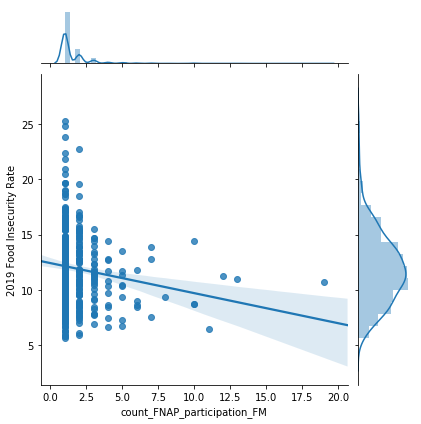

In [183]:
df_subselect = df[df["count_FNAP_participation_FM"]> 0]
jp = sns.jointplot(x = "count_FNAP_participation_FM", y = "2019 Food Insecurity Rate", data = df_subselect, kind = 'reg')

### Predictive model

4) decision tree

In [262]:
df = pickle.load(open("data/clean_data/team20_clean_MM_FA_FM_county_202207191713.pkl","rb"))
df = df.drop(columns=["FIPS", "State", "County", "High Threshold Type","Low Threshold Type"])
df = df.dropna()

# include only FNAP information so drop all sub-categories such as SNAP, WIC and SFMNP

columns2drop = ["count_{}_participation_{}".format(a, b) for a in ["SNAP", "WIC", "SFMNP"] for b in ["OFM", "CSA", "FM"]]
df = df.drop(columns=columns2drop)

# include only FNAP information so drop all sub-categories such as SNAP, WIC and SFMNP

columns2drop = ["count_{}".format(a) for a in ["OFM", "CSA", "FM"]]
df = df.drop(columns=columns2drop)

df

,2019 Food Insecurity Rate,# of Food Insecure Persons in 2019,Low Threshold in state,High Threshold in state,2019 Child food insecurity rate,# of Food Insecure Children in 2019,% food insecure children in HH w/ HH incomes below 185 FPL in 2019,% food insecure children in HH w/ HH incomes above 185 FPL in 2019,2019 Cost Per Meal,2019 Weighted Annual Food Budget Shortfall,P_FI_Below_Low_Threshold,P_FI_Between_Thresholds,P_FI_Above_High_Threshold,count_FNAP_participation_OFM,count_FNAP_participation_CSA,count_FNAP_participation_FM,TractSNAP,TractHUNV,TractKids,TractSeniors,lahunvhalf,LALOWI05_10,PovertyRate,lalowihalf,TractLOWI,Urban,MedianFamilyIncome
0,15.7,8670,130,185,19.6,2590.0,69,31,3.00,4439000.0,48.6,10.9,40.6,0.0,0.0,0.0,224.333333,99.250000,1217.750000,545.500000,87.009806,858.229840,16.130786,1293.160619,1436.916667,12.0,69337.500000
1,13.4,28590,130,185,14.4,6680.0,79,21,3.66,17895000.0,39.1,19.2,41.7,1.0,0.0,0.0,191.161290,87.258065,1351.548387,986.064516,70.270895,1054.515175,11.845546,1552.104536,1865.903226,31.0,72665.741935
2,20.7,5250,130,185,32.4,1720.0,72,28,3.11,2788000.0,66.3,6.2,27.5,0.0,0.0,0.0,279.555556,94.333333,668.333333,434.333333,82.501394,556.630110,29.299325,1322.333301,1341.444444,9.0,44792.444444
3,16.3,3680,130,185,21.8,1010.0,89,11,2.96,1861000.0,47.8,21.3,30.9,0.0,0.0,0.0,212.250000,102.500000,1300.250000,726.500000,110.154647,25.542561,12.193524,2087.128682,1992.000000,4.0,60645.500000
4,14.5,8380,130,185,15.4,2060.0,100,0,3.04,4357000.0,46.2,28.0,25.8,1.0,0.0,0.0,218.444444,95.111111,1567.333333,937.666667,91.316874,2038.838706,14.850748,2200.824287,2310.555556,9.0,60437.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,11.3,4940,130,185,14.7,1700.0,60,40,3.36,2839000.0,41.2,14.5,44.3,0.0,0.0,0.0,76.250000,32.333333,989.083333,303.583333,31.090187,358.935475,11.602957,772.067357,918.000000,12.0,85896.833333
3138,9.0,2100,130,185,7.2,320.0,81,19,4.61,1655000.0,33.0,18.5,48.6,0.0,0.0,0.0,47.500000,54.500000,1019.000000,524.500000,35.900055,287.517377,7.443584,891.379629,1161.500000,4.0,112766.750000
3139,12.6,2590,130,185,16.2,960.0,59,41,3.06,1357000.0,50.4,8.7,41.0,0.0,0.0,0.0,184.333333,100.666667,2123.666667,624.666667,94.501266,96.730785,12.443318,1890.085769,2180.666667,3.0,70347.666667
3140,11.6,930,130,185,16.4,330.0,76,24,3.24,515000.0,45.1,17.4,37.5,0.0,0.0,0.0,56.333333,57.333333,724.000000,502.666667,35.055937,252.691081,12.547283,461.128157,776.000000,3.0,67003.666667


In [264]:
df_numpy = df.to_numpy()

X = df_numpy[:, 1:]
y = df_numpy[:, 0]

In [265]:
from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)

In [266]:
yhat = clf.predict(X)

In [267]:
from sklearn.metrics import mean_squared_error

In [268]:
mean_squared_error(y, yhat)

3.4254172468586876e-32

In [260]:
df["TractSNAPRatio"] = 

SyntaxError: invalid syntax (<ipython-input-260-712761a809d5>, line 1)

In [90]:
# correlation between SNAP par in FM With SNAP recipients? 

df[["TractSNAP", "count_SNAP"]].corr()

,TractSNAP,count_SNAP
TractSNAP,1.000000,0.020456
count_SNAP,0.020456,1.000000


In [ ]:
# correlation between senior population and SFMNP?

df[["TractSNAP", "count_SNAP"]].corr()

In [75]:
df_fm["if_FNAP_FM"] = df_fm["count_FNAP_participation_FM"] > 0

In [4]:
# chi-square test on food accessibility vs food insecurity / farmer's market

In [8]:
contingency_table=pd.crosstab(df["2019 Food Insecurity Rate"],df["count_SNAP_participation_FM"])
print('contingency_table :-\n',contingency_table)
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 count_SNAP_participation_FM  0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   \
2019 Food Insecurity Rate                                                     
2.9                             1     0     0     0     0     0     0     0   
3.1                             1     0     0     0     0     0     0     0   
3.2                             1     0     0     0     0     0     0     0   
3.4                             1     0     0     0     0     0     0     0   
3.8                             1     0     0     0     0     0     0     0   
...                           ...   ...   ...   ...   ...   ...   ...   ...   
26.6                            1     0     0     0     0     0     0     0   
27.5                            1     0     0     0     0     0     0     0   
27.7                            1     0     0     0     0     0     0     0   
28.6                            1     0     0     0     0     0     0     0   
29.4                          